# STA 208: Homework 1 (Do not distribute)

## Due 4/18/2018 in class and online by 10am

__Instructions:__ To make grading easier for the TAs please print out your homework and also submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)
2. The predictor above is called the Bayes rule.  For the Hamming loss, write an expression for the true risk of the Bayes rule, this is the irreducible error.
3. Suppose that we know that the Bayes rule can be written in the form, 
$$
h(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 
4. Suppose that I told you that for any fixed $g$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(g) - R(g)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
How many samples would I need to get a classifier $\hat g$, from the previous question, such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
(Hint: use the union bound)

__Answers:__

__1.__
  Since $y_i \in \{0,1\}, i=1,\ldots,n$, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.
  
  True Risk:  
$R(g) = \mathbb E [\ell(Y,g(X))] = \mathbb E [1\{ y \ne g(X)\} \times \mathbb P(y \ne g(X) | X)+1\{ y \ne g(X)\} \times \mathbb P(y = g(X) | X)] \\ =\mathbb E [1\{ y \ne g(X)\}\mathbb P(y \ne g(X) | X)] \\ =\mathbb E [\mathbb P(y \ne g(X) | X)]$

  Therefore, to minimize the True Risk also means to minimize $\mathbb P(y \ne g(X) | X)$.

$g(x)=argmin(\mathbb P(y \ne g(X)| X))=argmin(1- \mathbb P(y = g(X) | X))=argmax(\mathbb P(y = g(X) | X))$

$g(x)= 
\begin{cases}
    1,& \text{if } \mathbb P(y = 1 | X)>\mathbb P(y = 0 | X)\\
    0,              & \text{if } \mathbb P(y = 1 | X)\leq \mathbb P(y = 0 | X)
\end{cases}$

__2.__

$\mathbb E [R(g)] = \mathbb E\{\mathbb E [\ell(Y,g(X))]\} = \mathbb E\{\mathbb E [1\{ y \ne g(X)\} \times \mathbb P(y \ne g(X) | X)+1\{ y \ne g(X)\} \times \mathbb P(y = g(X) | X)]\} \\ =\mathbb E\{\mathbb E [1\{ y \ne g(X)\}\mathbb P(y \ne g(X) | X)]\} \\ =\mathbb E\{\mathbb E [\mathbb P(y \ne g(X) | X)]\} \\ = \mathbb E [\mathbb P(y \ne g(X) )]$

__3.__

The fit method is the following:

for $j = 1,2, ..., p$:
>for $i = 1,2, ..., n$:

>> $e_i = y_i-\hat{y_i}$  ($\hat{y_i}=1\{ x_{ij} > 0 \}$)

> $R_j = \frac{1}{n}{\displaystyle \sum_{i=1}^{n}e_i^2}$

Then chose $\hat{j} = argmin(R_j)$ , we can get $h(x)=1\{x_{\hat{j}}>0\}$ as a classifier.

The predict method:

After getting the classifier $h(x)$ from the fitting method, for a new $x^*$, calculate $h(x^*) = 1\{{x_j}^*>0\}$ to get the prediction value.

__4.__

Please check the last page of hw1.

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$).  Give a clear expression for $H$.
2. By modifying the matrix $H$, how can we ensure that a given sample is not used as a k nearest neighbor.  Derive an expression for the leave-one-out cross validated square error based on this.
3. For linear regression, let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.
4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values on the diagonal (all others are set to 0).  Call this new matrix $D_r$ ($r < p$).  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

__Answers:__

__1.__
For linear regression in matrix:

$Y =X\beta+\varepsilon$, to derive the OLS regression, $Q = argmin[(Y=X-\beta)^\top(Y-X\beta)]=Y^\top Y=2X^\top Y\beta+\beta^\top X^\top X\beta$.

$\frac{\partial Q}{\partial \beta}=-2X^\top Y +2X^\top X\beta = 0$, which means $X^\top X\beta=X^\top Y$.

$\hat{\beta} = (X^\top X)^{-1}X^\top Y$

$\hat{Y} = X\hat{\beta} = X(X^\top X)^{-1}X^\top Y = H_lY$, where $H_l = X(X^\top X)^{-1}X^\top$

For KNN regression:

Take $\hat{y_i}$ as an example, it can be denoted in the matrix form as $\hat{y_i} = \frac{1}{k} \begin{bmatrix} 0&1&1&.....&0&1&....&1\end{bmatrix} \begin{bmatrix} y_1\\y_2\\.\\.\\.\\.\\y_n\end{bmatrix}=H_i Y$, where $H_i$ is the $i_{th}$ row of $H_K$, and for elements in $H_i$, the $j_{th}$ element $=1$ if $X_j \in \{X_m\}_{m=1}^k$, $\{X_m\}_{m=1}^k$ are k-nearest neighbors of $X_i$, and the $j_{th}$ element $=0$ otherwise.

Therefore, $H_K$ is a $n\times n$ matrix which looks like $\frac{1}{k} \begin{bmatrix} 0&1&1&.....&0&1&....&1\\1&0&0&.....&0&1&....&0\\.&.&.&.....&.&.&....&.\\.&.&.&.....&.&.&....&.\\.&.&.&.....&.&.&....&.\\0&0&1&.....&1&0&....&1\end{bmatrix}$. For each row, there are $k$ of $1$ and $(n-k)$ of $0$.

__2.__

For the given $i_{th}$ sample that is not used as a $k$ nearest neighbor, you can set the $i_{th}$ column in $H$ matrix fixed to all be $0$.

The leave-one-out cross validation is the following:

$H_{Ki}$ ($i = 1,2,...,n$) are $n\times n$ matrices.

for $i = 1, 2, ..., n$:

> elements in $i_{th}$ column of $H_{Ki}$ fixed to be $0$;

> get $H_{Ki}$ by getting the $k$ nearest neighbor among all $X$ (except $X_j$ itself and the not used sampe $X_i$) of each $X_j$ $(j = 1,2,...,i-1,i+1,..,n)$ aside of $X_i$.

> get the square error $e_i$ which is the difference between the fitted value using $H_{Ki}$ and the observed value $Y$.

Sum all the $e_i^2$ to get the leave-one-out cross validated square error $SE = {\displaystyle \sum_{i=1}^{n}e_i^2}$ ,  where 
$e_i^2 = \frac{1}{n-1}{||H_{Ki}Y-I_iY||^2}$, where the $i_{th}$ diagonal element of $I_i$ is $0$ (i.e. $I_i[i,i] = 0$).

__3.__

The fitting method:

As $X=UDV^\top$, then $\beta = (X^\top X)^{-1}X^\top Y$, where $X^\top X = VD^\top U^\top UDV^\top$, as $U$ is orthonormal, then $U^\top U = I$, $X^\top X = VD^\top DV^\top$, $(X^\top X)^{-1} = (V^\top)^{-1}D^{-2}V^{-1}$ since $D$ is diagonal ($D^\top D = D^{2}$) and $V$ is orthonormal ($V^\top =V^{-1}$).

Therefore, we can derive that $\beta = (X^\top X)^{-1}X^\top Y = VD^{-2}V^{-1}VDU^\top Y = VD^{-1}U^\top Y = Ab$. 

According to the question, we can define $A=VD^{-1}$ and $b=U^\top Y$.

The preficting method:

With a new data $X^*$, $\hat{Y}^* = X^*\beta$, where $\beta$ is derived from the fitting method.

__4.__

Given $b$ has been computed already, we can first derive original $V$ and $D$ from $X$, then we can get the $D^{-1}$, through keeping the first $r$ smallest diagonal values of $D^{-1}$ and set the rest to be $0$ to get a new $D_r^{-1}$. Also keep the $p$ rows and first $r$ columns of $V$ and set the rest to be $0$ to get the new $V_{pr}$. Then we can get the new $A = V_{pr} D_r^{-1}$. Its computational complexity is $pr+r$.

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function.

In [1]:
import numpy as np
from numpy.linalg import inv
#from scipy.linalg import svd

In [87]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self, r):
        """
        : Store the rank
        """
        self.r = r
        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        u, d, vt = np.linalg.svd(X)
        v=vt.T
        self.d = d
        self.n = len(u)
        self.p = len(v)
        self.v = v
        self.u = u
        self.y = y
    
        A=np.matmul(self.v[:,:self.r],np.diag(1/(self.d[:self.r])))  # get A matrix
        self.b=np.matmul(self.u.T[:self.r,:],y)    # get b vector
        self.beta = np.matmul(A,self.b)
        y_hat = np.matmul(X,self.beta)  # get the fit y_hat
        return y_hat
        
    def predict(self, X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        y_predict = np.matmul(X_test,self.beta)
        return y_predict
        
    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        self.r = r
        A=np.matmul(self.v[:,:self.r],np.diag(1/(self.d[:self.r])))  # get A matrix
        self.b=np.matmul(self.u.T[:self.r,:],self.y)    # get b vector
        self.beta = np.matmul(A,self.b)
        self.beta = np.matmul(A,self.b)

In [78]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

In [203]:
X,y,X_test,y_test = gen_LR_data()

In [184]:
r=SingularValueRegressor(20)
r.fit(X,y)
mse = {20:np.average((y_test-r.predict(X_test))**2)}
for i in range(19,0,-1):
    r.change_rank(i)
    mse[i] = np.average((y_test-r.predict(X_test))**2)

mse

{1: 15.12576131284448,
 2: 12.558820233366562,
 3: 10.026706428467124,
 4: 9.920147766622703,
 5: 9.605877384468624,
 6: 6.955384375376483,
 7: 5.648627212837235,
 8: 3.1528407151380486,
 9: 2.6352097714476685,
 10: 1.3133946709052358,
 11: 1.3130880503173312,
 12: 1.3215043413977725,
 13: 1.3096612648077914,
 14: 1.3024242793915664,
 15: 1.2980325097960586,
 16: 1.2528329275973484,
 17: 1.249710340510545,
 18: 1.2572608846136426,
 19: 1.2576456477082194,
 20: 1.4512997625592217}

__Conclusion:__

The average square error on the test set for all possible $r$ is shown above.

Obviously, as the $r$ increasing, the average square error decreases since less information is lost.

__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SVRegression.  Compare and tune the methods using appropriate cross validation.  Comment on the tuning of each parameter in ridge, kNN, and SVRegression in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  Feel free to use the LOO method from lab 1.

In [41]:
import pandas as pd

In [185]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


I decide to drop NA directly.

In [186]:
data_mat = data_mat.dropna()
X_data = data_mat.iloc[:,1:]

In [187]:
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model, neighbors
from sklearn.linear_model import Ridge, RidgeCV

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [188]:
def loo_risk(X,y,regmod):
    """
    Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

def emp_risk(X,y,regmod):
    """
    Return the empirical risk for square error loss
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar empirical risk
    """
    regmod.fit(X,y)
    y_hat = regmod.predict(X)
    return np.mean((y_hat - y)**2)

In [208]:
# Ridge Regression
alphas = np.linspace(30,1,100)
rcv = RidgeCV(alphas = alphas, store_cv_values=True)
rcv.fit(Xsc,y)
cv_vals = rcv.cv_values_
LOOr = cv_vals.mean(axis=0)

In [222]:
print("lambda of the smallest LOO risk is",rcv.alpha_)
print("The smallest LOO risk is", min(LOOr))

lambda of the smallest LOO risk is 1.878787878787879
The smallest LOO risk is 11.35932440981971


In [209]:
ridge = Ridge()
EMPr = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(Xsc, y)
    EMPr.append(emp_risk(Xsc,y,ridge))

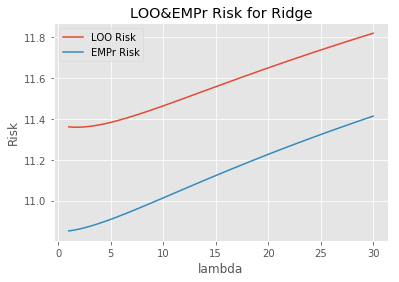

In [220]:
plt.plot(alphas,LOOr, label = 'LOO Risk')
plt.plot(alphas,EMPr, label = 'EMPr Risk')
plt.xlabel('lambda')
plt.ylabel('Risk')
plt.title('LOO&EMPr Risk for Ridge');
plt.legend()
plt.show()

__Ridge Regression:__

From the above graph, the LOO risk and the EMPr Risk are both moderately increasing as the $\lambda$ increasing. 

When $\lambda = 1.878787878787879$, we are able to get the smallest LOO Risk $11.35932440981971$.

In [223]:
# OLS Regression
lin1 = linear_model.LinearRegression(fit_intercept=False)
Xsc = scale(X_data)
y = np.array(data_mat['Y'])
print('Without intercept,')
print('LOO Risk: '+ str(loo_risk(Xsc,y,lin1)))
print('Emp Risk: ' + str(emp_risk(Xsc,y,lin1)))

Without intercept,
LOO Risk: 581.8425227089203
Emp Risk: 560.5585690332971


In [224]:
lin1 = linear_model.LinearRegression(fit_intercept=True)
Xsc = scale(X_data)
y = np.array(data_mat['Y'])
print('With intercept,')
print('LOO Risk: '+ str(loo_risk(Xsc,y,lin1)))
print('Emp Risk: ' + str(emp_risk(Xsc,y,lin1)))

With intercept,
LOO Risk: 11.371126332686615
Emp Risk: 10.847480945000452


__OLS Regression:__

Without intercept, the LOO Risk and the EMP Risk are both very large compared with Risks of other regressions.

With intercept, the output is highly improved. Also we can find out that the difference between these two risks are not very much, which states that _OLS regression_ is an adequate regression in this case.

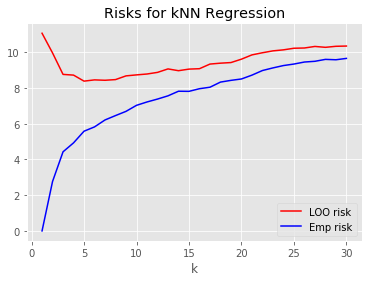

In [226]:
# KNN Regression
LOOs = []
MSEs = []
K=30
Ks = range(1,K+1)
for k in Ks:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    LOOs.append(loo_risk(Xsc,y,knn))
    MSEs.append(emp_risk(Xsc,y,knn))

plt.plot(Ks,LOOs,'r',label="LOO risk")
plt.title("Risks for kNN Regression")
plt.plot(Ks,MSEs,'b',label="Emp risk")
plt.legend()
_ = plt.xlabel('k')

In [231]:
print("We are able to get the smallest LOO risk when k =",np.argmin(LOOs)+1)
print("The smallest LOO risk in KNN regression is:",min(LOOs))

We are able to get the smallest LOO risk when k = 5
The smallest LOO risk in KNN regression is: 8.384319387755102


__KNN Regression:__

From the above graph, the LOO risk first decreases to its minimum value $8.384319387755102$ when $k=5$, after the minimum point, it starts to slowly increase. The Emp risk is keeping increasing as k becomes large, and it sharply increases at the beginning, after $k=5$, the increasing trend becomes moderate and the difference between LOO risk and Emp Risk becomes smaller with the increasing $k$.

Comparing the LOO risk of KNN Regression with that of other regressions, KNN gives us the smallest LOO risk.

In [232]:
# SVRegression
LOOs = []
MSEs = []
P=7
Ps = range(1,P+1)
for p in Ps:
    SVD = SingularValueRegressor(p)
    LOOs.append(loo_risk(Xsc,y,SVD))
    MSEs.append(emp_risk(Xsc,y,SVD))

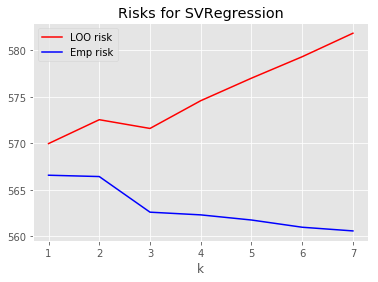

In [234]:
plt.plot(Ps,LOOs,'r',label="LOO risk")
plt.title("Risks for SVRegression")
plt.plot(Ps,MSEs,'b',label="Emp risk")
plt.legend()
_ = plt.xlabel('k')

In [233]:
print("We are able to get the smallest LOO risk when r =",np.argmin(LOOs)+1)
print("The smallest LOO risk in SVRegression is:",min(LOOs))

We are able to get the smallest LOO risk when r = 1
The smallest LOO risk in SVRegression is: 569.9617303128016


__SVRegression:__

From the above graph, apparently when $r = 1$, we are able to get the smallest LOO risk which is $569.9617303128016$. Then the LOO risk increases a little and decreases a little, then from $r=3$, the LOO risk keeps increasing. For EMP risk, as the $r$ increasing, it keeps decreasing.

However, both the LOO Risk and the EMP Risk of SVRegression are much larger than those of other regressions.